### Worksheet 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Union
from scipy.optimize import minimize

### Problem 1
$$\min_{x \in R}(1-\frac{1}{2}x^2) * e^{-\frac{1}{2}x^2}$$




**Problem 1a**

Computing the first and second derivative with respect to x

Let  $f(x) = (1-\frac{1}{2}x^2)  e^{-\frac{1}{2}x^2}$ and $u = -\frac{1}{2}x^2$

Hence, $$f(u) = (1+u)e^u$$
By Chain rule, we note that: $$\frac{\delta f}{\delta x} = \frac{\delta f}{\delta u} \frac{\delta u}{\delta x}$$
Now we solve:
$$\frac{\delta f}{\delta u} = e^u + e^u(1+u)$$
$$\frac{\delta f}{\delta u}=2e^u+ue^u$$
$$\frac{\delta u}{\delta x} = -x$$
Therefore, By chain rule and substituting $u$ by $-\frac{1}{2}x^2$ we obtain:
$$\frac{\delta f}{\delta x} = xe^{\frac{-x^2}{2}}\frac{x^2-4}{2}=e^{\frac{-x^2}{2}}(\frac{x^3}{2}-2x)$$



Now, having solved the first derivative, we can solve for the second derivative.
This is given by:

$$\frac{\delta^2f}{\delta x^2}= e^{\frac{-x^2}{2}}\frac{-x^4+7x^2-4}{2}$$
***

**Problem 1b**

Set the derivative equal to 0 and solve for x

Setting the derivative equal to 0 we get:
$$e^{\frac{-x^2}{2}}(\frac{x^3}{2}-2x)=0$$
$$\frac{x^3}{2}-2x=0$$
$$x(x-2)(x+2)=0$$

Hence, the possible values for $x$ include: $x=0,x=-2,x=2$
***


**Problem 1c**

Inspect the second derivative and identify local minima

At $x=0$, the second derivative = -2 < 0 

At $x=2$, the second derivative is greater than 0

At $x=-2$ the second derivative is also greater than 0.

Therefore, the function have two local minima at $x=2$ and $x=-2$
***


**Problem 1d**

Since the domain of the function is unbounded in the real numbers, we note that the two local minima are also global minima.
***

### Problem 2

Given that $a,b,x \in \mathbb{R^2}$ and $\theta (x) = \angle (\bar{bx}, \bar{ba})$ be the angle around $b$ between $x$ and $a$. We will now find the gradient of $\theta$. 

For easier notation, we will set: $$v_1=\bar{bx}$$ $$v_2=\bar{ba}$$

We note that, since $\theta$ is a function of $x$, then $x$ is the variable that is changing while $a$ and $b$ are constant. This means that the vector $v_1$ might vary while $v_2$ remains constant.

Now, suppose we rotate $v_1$ $360\degree$ arount $b$ while making sure that the angle between $v_1$ and $v_2$ is not changed, we will notice that, we will create a circle around $b$. 

This means that, any point on the circle is a point where $\theta(x)$ is unchanged if $v_1$ moves along the point. 

This means that the gradient of the function is orthogonal to $v_1$. We note that vectors orthogonal to $v_1$ can face inwards into (into the circle) or outwards. 

We also note that, moving inwards into the circle would degrease the function $\theta(x)$.

Therefore, suppose $v_1 = \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}$ where $w_1$ and $w_2$ are $x$ and $y$ components of the vector respectively.

A vector orthogonal to $v_1$ is $\begin{bmatrix} -w_2 \\ w_1 \end{bmatrix}$

Therefore, $\nabla_x\theta(x)= \begin{bmatrix} -w_2 \\ w_1 \end{bmatrix}$ 
***

### Problem 3

*3a*
Given: $$f(x)=tanh((x+1.0)(x-0.8)(x+0.1))$$
$$d(t) = \frac{f(t)-f(0)}{t}$$
Upon calculation, we find the derivative of $f$ is given by:
$$f'(x) = \frac{3(x^2+0.2x-0.6)}{cosh((x-0.8)(x+0.1)(x+1)}$$


In [2]:
def f(x: Union[float, np.array]):
    """
    calculates f(t) as given in the function
    """
    product = (x+1.0)*(x-0.8)*(x+0.1)
    return np.tanh(product)

def d(t):
    return (f(t)-f(0))/t

def f_dash_x(x):
    """
    Calculates the derivative of f at point x
    """
    return 3*(x**2+0.2*x-0.26)*(1/np.cosh((x-0.8)*(x+0.1)*(x+1))**2)

def grad(f: Callable, point: float, step_size: float=1e-9) -> float:
    """
    numerically computes the gradient of f at a point. I will be using taylor approximation for this...
    #TODO: Probably remove this? idk. am not using it for now.
    """
    f_x = f(point)
    f_x_plus_1 = f(point+step_size)
    return (f_x_plus_1 - f_x) / step_size

In [3]:
t = np.linspace(-5, 5, 100000)
d_t = d(t)
f_x = f(t)
f_dash_0 = f_dash_x(0)

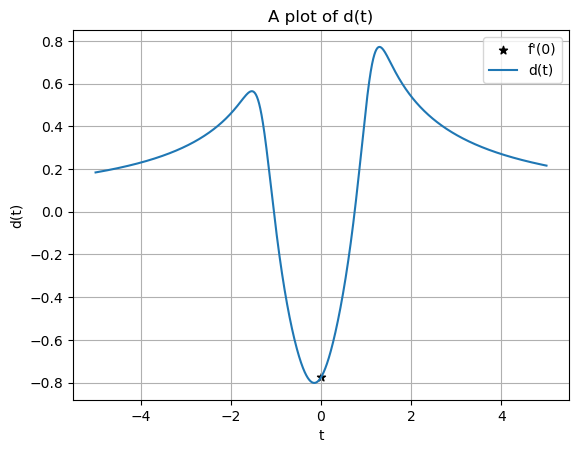

In [5]:
plt.scatter(0, f_dash_0, marker="*", color = "black", label = "f'(0)")
plt.plot(t, d_t, label = "d(t)")
plt.xlabel("t")
plt.ylabel("d(t)")
plt.title("A plot of d(t)")
plt.legend()
plt.grid()
plt.show()

**Notes on values of d close to 0**
- We note that $d(0)$ is undefined. This means that the function $d(t)$ is assymptotically approaching 0 in the positive and negative directions as shown in the plot above
- The minimum of d(t) is close to the $f'(0)$. It is a good approximation of the derivating of f at point 0.

***




#### Question 3b

 Proof that if $f$ is a continous differentiable function and $f'(x_0)\neq 0$ then there exist an $\eta$ >0 such that $f(x_0)>f(x_0 - \eta f'(x_0)$.

Suppose that such a function existed.
We note that $f'(x_0)$ is the slope of the function at point $x_0$. This means that $f'(x_0)$ gives the direction with the greatest change in the function $f$ at point $x_0$.

Therefore, if we evaluate the function $f(x_0 - \eta f'(x_0)$, we will be moving in the direction of steepest descent of our function $f$ at point $x_0$ up to a certain threshold for the value of $\eta$. Therefore, there will always be a choice of $\eta$ for which $f(x_0)>f(x_0 - \eta f'(x_0)$ holds.
***



#### Question 3c

Proof that assuming $\nabla_x f(x_0) \neq 0$, then there exist an $\eta>0$ such that $f(x_0) > f(x_0 - \eta \nabla_x f(x_0))$

We note that this question is similar to $3b$ except it is in not limited to one dimension. The explaination is therefore very similar.

The gradient vector $\nabla_x f(x_0)$ will provide the direction of the largest change in the function at point $x_0$. therefore, if we know the direction of the largest change in the function, we can move in the direction of negative gradient as this will lead to us moving towards a lower point in the function space.

Therefore, if we choose a small enough $\eta$, we are guaranteed to land in a lower value of the function. Hence there exist a number $\eta$ such tyhat  $f(x_0) > f(x_0 - \eta \nabla_x f(x_0))$ holds.

***


#### Question 3d

Goal: Given the function $f$ defined below, compute the gradient at point (0.1, 5)
$$f(x_1, x_2) = \frac{x_1 ^ 2 + x_2^2}{100}-\frac{cos(3x_1-3x_2)+cos(3x_1+3x_2)}{2}$$

Upon calculation, we get:

$$\nabla f(x_1,x_2)=  \begin{pmatrix}
\frac{75 \sin\left(3x_{1} + 3x_{2}\right) + 75 \sin\left(3x_{1} - 3x_{2}\right) + x_{1}}{50}\\
\frac{75 \sin\left(3x_{2} + 3x_{1}\right) + 75 \sin\left(3x_{2} - 3x_{1}\right) + x_{2}}{50}
\end{pmatrix}
$$

The code cell below gives us functions to the gradient at point $(0.1,5)$


In [6]:
def f(x_1, x_2):
    square_sums = x_1**2 + x_2**2
    cos_sums = np.cos(3*x_1 - 3*x_2) + np.cos(3*x_1 + 3*x_2)
    out = (square_sums/100)- (cos_sums/2)
    return out

def grad_with_respect_to_x1(x_1, x_2):
    return (75 * np.sin(3 * x_1 + 3 * x_2) + 75 * np.sin(3 * x_1 - 3 * x_2) + x_1) / 50

def grad_with_respect_to_x2(x_1, x_2):
    return (75 * np.sin(3 * x_2 + 3 * x_1) + 75 * np.sin(3 * x_2 - 3 * x_1) + x_2) / 50

gradient_vector = np.array([grad_with_respect_to_x1(0.1, 5), grad_with_respect_to_x2(0.1, 5)])
print(f"Gradient vector: {gradient_vector}")

Gradient vector: [-0.67150939  1.96373111]


From the code above we see that:
$$\nabla f(0.1, 5) = \begin{pmatrix}
                       -0.6715093870184832 \\
                       1.9637311064103196
                      \end{pmatrix}$$

Having shown this. the code cell below will plot the function $g(t)=f(x_0+t \nabla_x f(x_0)$

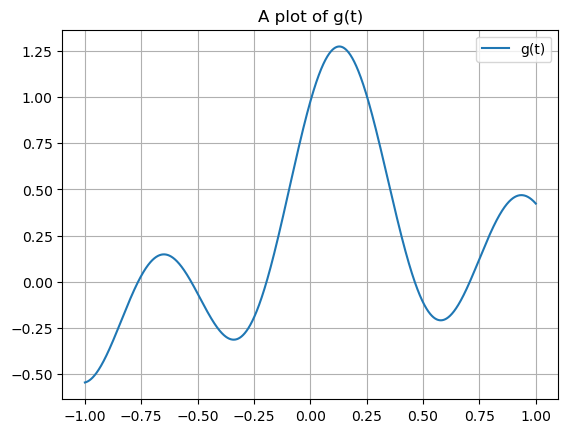

In [10]:
x_dash_1 = gradient_vector[0]
x_dash_2 = gradient_vector[1]


t = np.linspace(-1, 1, 100000)
f_t = f(t, t)
def g(t_):
    new_t = t_[:, np.newaxis]*gradient_vector + np.array([0.1, 5])
    g_t = f(new_t[:,0], new_t[:,1])
    return g_t

plt.plot(t, g(t), label = "g(t)")
# plt.plot(t, f(t, t), label = "f(t, t)")
# plt.scatter(x_dash_1, x_dash_2, marker="*", color = "black")
plt.title("A plot of g(t)")
plt.legend()
plt.grid()
plt.show()

***
### PROBLEM 4

#### Problem 4a
We want to use the function $x_{r_i,c,k_i}(t)$ to approximate the function $x_i(t)$ for all i. To do that we have to minimize the error which arises from the approximation. To punish higher errors more heavily we will use the MSE, so that larger errors get more weight. That means for a specific island we have to compute $MSE_i(r_i,c,k_i)= \frac{1}{n_i} \sum_{t_j \in t}^{n_i}(x_{r_i,c,k}(t_j)-x_i(t_j))^2$.

As we want the approximation to work over all islands, we now have to sum over the MSE for every island i: $\sum_{i}MSE_i(r_i,c,k_i)$, and minimize this total error. That means the final term for the minimization is $min \sum_{i}\frac{1}{n_i} \sum_{t_j \in t}^{n_i} (k_i * e^{r_i*t_j}-\frac{c}{r_i}-x_i(t_j))^2$

#### Problem 4b
The growth rate $r_i$ could get negative if the population declines, so we have no constraint there. As k is just described as and additional parameter with no further details, it remains unconstrained. But c has to be greater than 0, so we get:
$min \sum_{i}\frac{1}{n_i} \sum_{t_j \in t}^{n_i} (k_i * e^{r_i*t_j}-\frac{c}{r_i}-x_i(t_j))^2$ such that $c \geq 1$

Optimal growth rates (r): [ 0.01654892  0.01822211  0.03530082 -0.01270397  0.04066758  0.04907393
  0.05240408  0.06438878]
Optimal addition amount (c): 0.03805581603391913
Optimal parameters (k): [ 1.32657315  1.21526416  0.31581197 -0.47713891  0.28407072  0.17663028
  0.16831397  0.07312608]


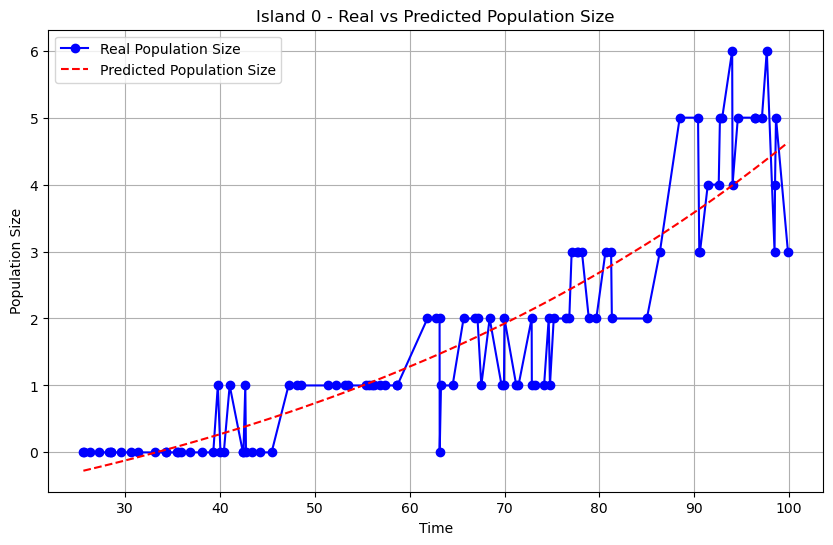

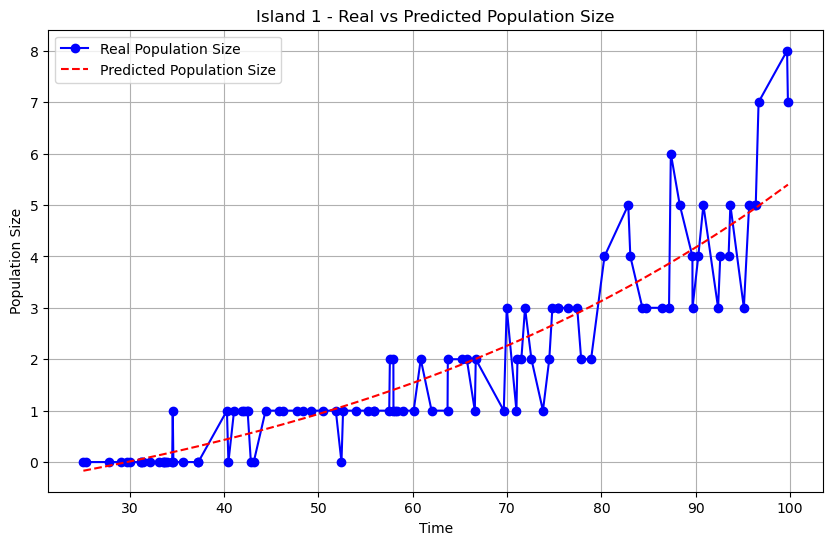

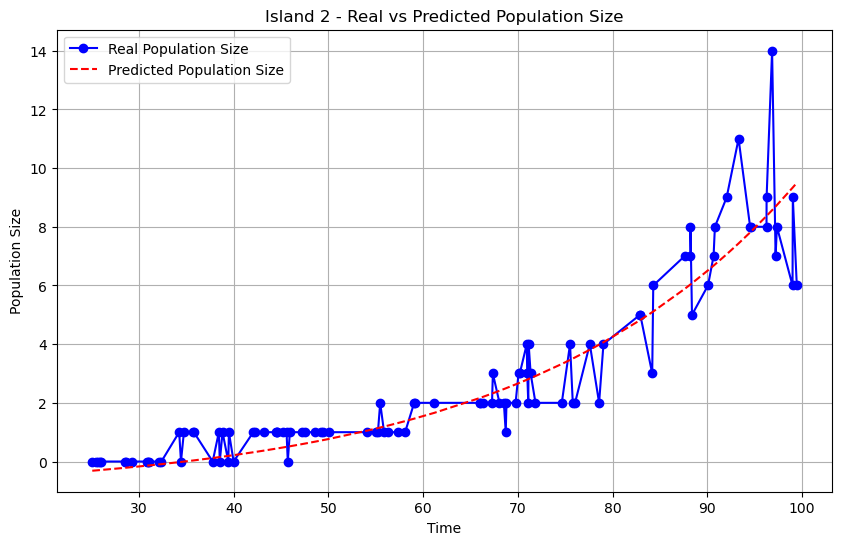

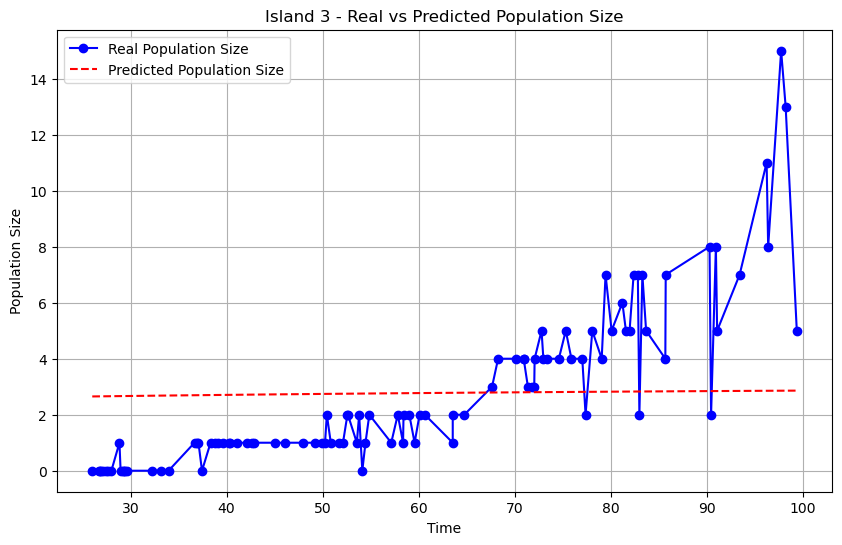

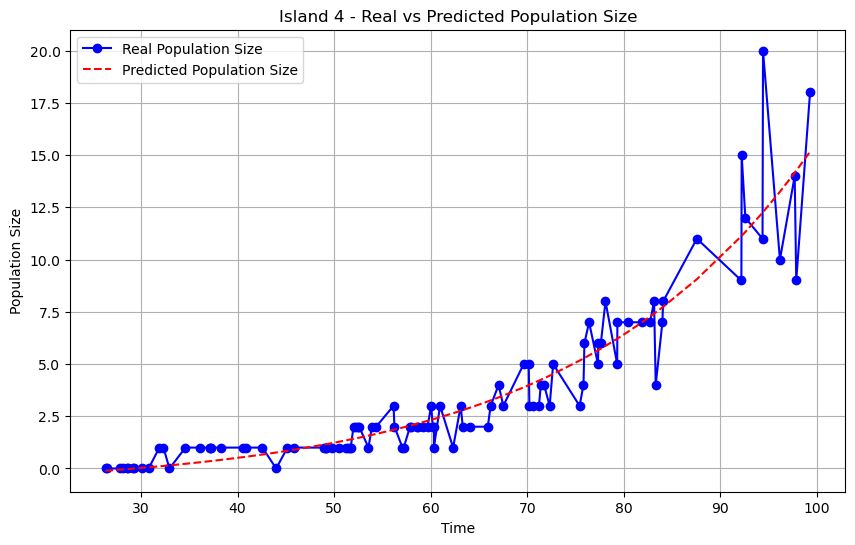

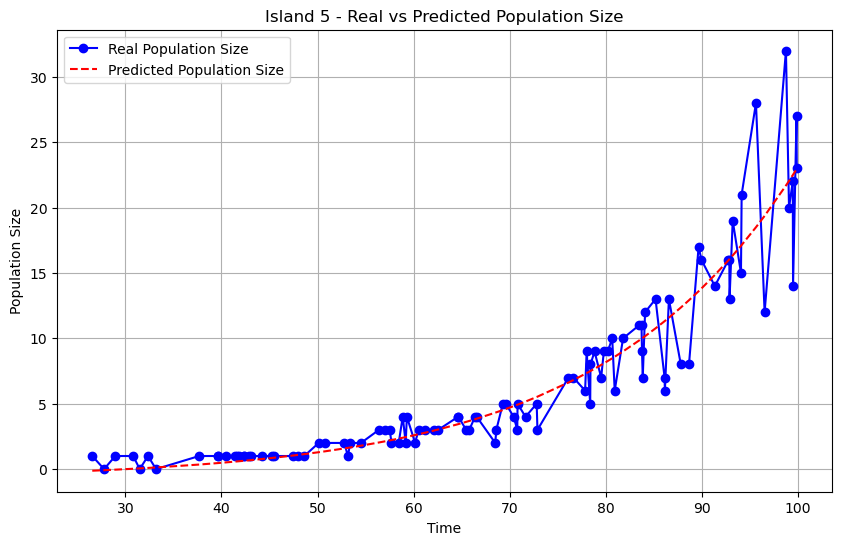

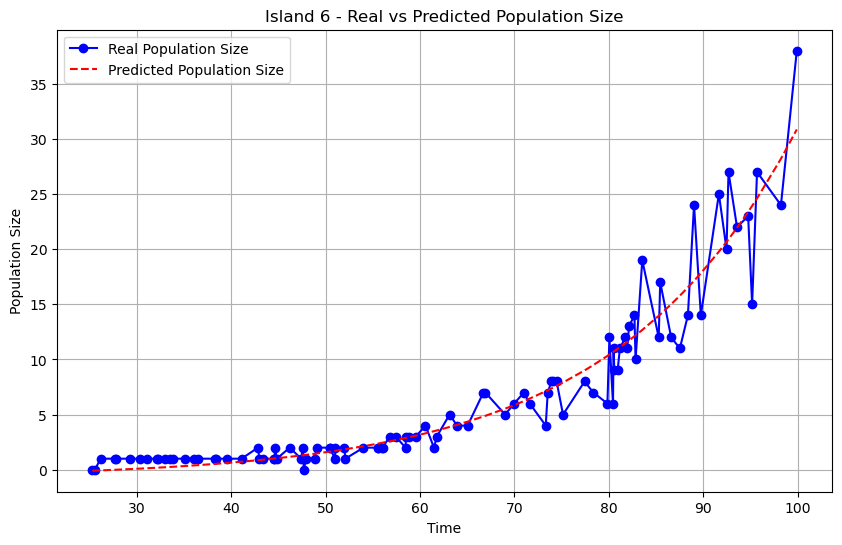

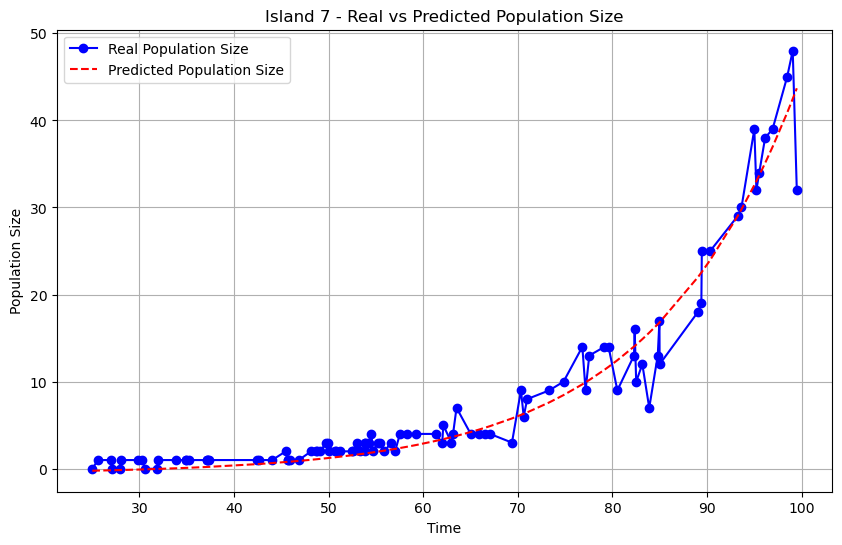

In [11]:

# Load data from the CSV file
data = np.loadtxt('data/population.csv', skiprows=1, delimiter=',')
# Split the data into time, island_id and population_size
time = data[:, 0]
island_id = data[:, 1]
population_size = data[:, 2]

num_islands = len(np.unique(island_id))
# Random initialization
np.random.seed(0)  # For reproducibility
r_initial = np.random.normal(loc=0.1, scale=0.1, size=num_islands)
c_initial = np.abs(np.random.normal(loc=1.0, scale=0.5))  # Ensure c > 0
k_initial = np.random.normal(loc=1.0, scale=0.5, size=num_islands)

# Approximate the population
def model_population(t, r, c, k):
    return k * np.exp(r * t) - c / r

# Calculates the total MSE across all islands
def objective_function(params, time, island_id, population_size, num_islands):
    # Prepare the function parameters
    r_values = params[:num_islands]
    c = params[num_islands]
    k_values = params[num_islands+1:]

    mse_total = 0
    # Loop over all islands
    for i in range(num_islands):
        mask = island_id == i   # Only look at the data for the corresponding island
        t_i = time[mask]
        x_i = population_size[mask]

        predicted_x_i = model_population(t_i, r_values[i], c, k_values[i])
        mse_total += np.mean((predicted_x_i - x_i) ** 2)

    return mse_total


# Combine initial guesses for r, c, and k into one parameter array
initial_params = np.concatenate([r_initial, [c_initial], k_initial])

# Optimization with a constraint that c >= 1
constraints = {'type': 'ineq', 'fun': lambda params: params[num_islands] - 1}

# Run the optimization
result = minimize(objective_function, initial_params, args=(time, island_id, population_size, num_islands), method='L-BFGS-B')# bounds=bounds)


# Extract the optimized parameters
optimized_params = result.x
r_optimal = optimized_params[:num_islands]
c_optimal = optimized_params[num_islands]
k_optimal = optimized_params[num_islands+1:]

print("Optimal growth rates (r):", r_optimal)
print("Optimal addition amount (c):", c_optimal)
print("Optimal parameters (k):", k_optimal)

# Plot the real vs predicted population size for each island to get a visual demonstration of how close the prediction is
for i in range(num_islands):
    # Filter data for the current island
    mask = island_id == i   # Only look at the data for the corresponding island
    t_i = time[mask]
    x_i_real = population_size[mask]

    # Use optimized parameters to get the predicted population
    r_opt = r_optimal[i]
    k_opt = k_optimal[i]
    x_i_pred = model_population(t_i, r_opt, c_optimal, k_opt)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(t_i, x_i_real, 'bo-', label='Real Population Size')
    plt.plot(t_i, x_i_pred, 'r--', label='Predicted Population Size')

    plt.title(f'Island {i} - Real vs Predicted Population Size')
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Problem 4d

Judging by the graphs the optained results approximate the real values very well. On some islands where the population has greater jumps the approxmiation does not fit the data that closely, but as it is only an approximation it finds a smooth curve which goes through the middle of the mass of the points. Additionaly one has to keep in mind, that the result is only an approximation. The values are all real numbers, but we could not add c = 0.029625007544707874 individuals. As for the approximation the values work great.

It was rather difficult to find the right starting points, as that heavily influenced the outcome. For that reason we introduced a seed to be able to re-choose the starting points. When using other seeds one can see the great influence, as the graphs start out with a negative population and then quickly overshoot the real population or just straight up bend in the wrong direction. This effect could be observed with a seed of 1 instead of 0.